SYDE 572 Lab 0 - Python Introduction<br>
Name: Charlie Fisher<br>
Date: Jan 19, 2023

In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
"""
2D Gaussian pdf

This function creates the pdf for a 2D Gaussian random variable

:param np.array (nx1 vector) X1: range of x1 component
:param np.array (mx1 vector) X2: range of x2 component
:param np.array (2x1 vector) mean: the mean of the random variable
:param np.array (2x2 matrix) covariance: the covariance matrix of the random variable

:return: the pdf for the range of x1, x2
:rtype: np.array (nxm matrix)

Usage (Example):
    Y = gauss2d(np.arange(-3,3.1,0.1),np.arange(0,6.1,0.1),np.array([0, 3]), np.array([[1, 1], [1, 4]])
"""
def guass2d(X1: np.array, X2: np.array, mean: np.array, covariance: np.array) -> np.array:

    """Computes the Gaussian pdf at a particular point (x1, x2)"""
    def pdf(x1: float, x2: float) -> float:
        k = 2
        x = np.array([x1, x2]).reshape((2,1))
        return (
            np.exp(-1/2*np.transpose(x - mean)@np.linalg.inv(covariance)@(x - mean))/
            np.sqrt(np.power(2*np.pi, k) * np.linalg.det(covariance))
        )

    Y = np.zeros((X2.shape[0], X1.shape[0]))
    for i, x2 in enumerate(X2):
        for j, x1 in enumerate(X1):
            Y[i, j] = pdf(x1, x2)
    return Y

Text(0.5, 0, '$p(x_1,x_2)$')

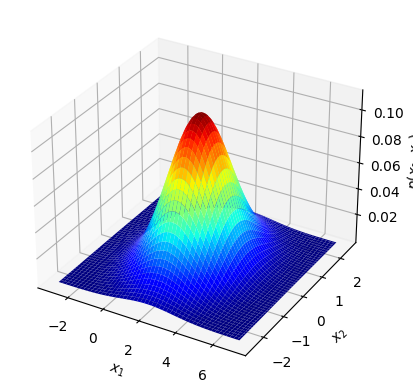

In [126]:
# generate distribution
mu = np.array([2, 0]).reshape((2,1))
cov = np.array([[2, 0], [0, 1]])

extent = (
    mu[0,0]-2.5*cov[0,0], mu[0,0]+2.5*cov[0,0],
    mu[1,0]-2.5*cov[1,1], mu[1,0]+2.5*cov[1,1]
)
x1 = np.linspace(extent[0], extent[1], num=100)
x2 = np.linspace(extent[2], extent[3], num=100)
Y = guass2d(x1, x2, mu, cov)
_, ax = plt.subplots(subplot_kw={'projection': '3d'})

# plot surface
X1, X2 = np.meshgrid(x1, x2)
ax.plot_surface(X1, X2, Y, cmap='jet')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$p(x_1,x_2)$')

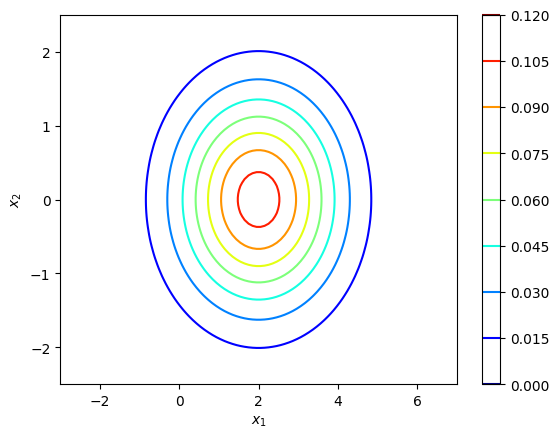

In [127]:
# plot contour
fig, ax = plt.subplots()
cnt = ax.contour(X1, X2, Y, cmap='jet', extent=extent)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.colorbar(cnt)

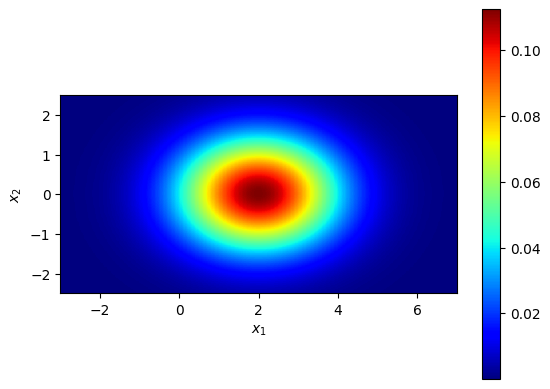

In [128]:
# plot heatmap
fig, ax = plt.subplots()
im = ax.imshow(Y, cmap='jet', origin='lower', extent=extent) 
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.colorbar(im)

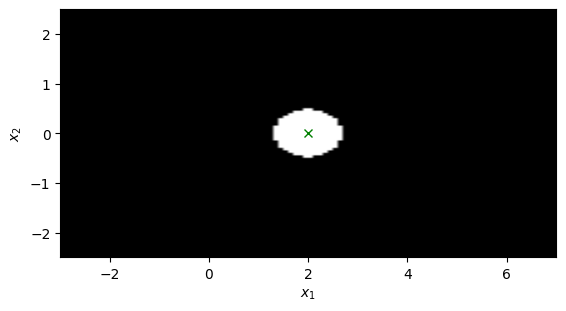

In [129]:
# plot region
region = Y > 0.1

fig, ax = plt.subplots()
ax.imshow(region, cmap='gray', origin='lower', extent=extent)
ax.plot(mu[0], mu[1], 'gx')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
plt.show()